# Image Transformations for Disease Analysis

Ce notebook démontre les 6 types de transformations d'images utilisées pour l'analyse des maladies des feuilles.

## 1. Imports

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 2. Fonctions de Transformation

Définition des 6 transformations principales pour l'analyse d'images.

In [7]:
# Définition de la fonction gaussian_blur qui prend une image en entrée
def gaussian_blur(image):
    """Applique un flou gaussien pour réduire le bruit.
    Simple : lisse l'image en mélangeant les pixels voisins pour atténuer les détails et le bruit."""
    # Applique le flou gaussien avec un noyau 15x15 et sigma 0, retourne l'image filtrée
    return cv2.GaussianBlur(image, (15, 15), 0)


# Définition de la fonction mask_image qui prend une image en entrée
def mask_image(image):
    """Crée un masque binaire de l'image.
    Simple : transforme l'image en noir et blanc selon un seuil (>=128 devient blanc) pour isoler les parties claires."""
    # Convertit l'image de BGR en niveaux de gris
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Seuil binaire: pixels >=128 deviennent 255, les autres 0 ; retourne le masque
    _, mask = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    # Retourne le masque binaire
    return mask


# Définition de la fonction roi_objects qui prend une image en entrée
def roi_objects(image):
    """Détecte et dessine les contours (ROI) sur l'image.
    Simple : trouve les formes dans l'image et les entoure en vert pour montrer les régions d'intérêt."""
    # Convertit l'image en niveaux de gris pour la détection de contours
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Applique un seuillage binaire pour obtenir une image binaire
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    # Trouve les contours dans l'image seuillée
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE,
                                   cv2.CHAIN_APPROX_SIMPLE)
    # Crée une copie de l'image pour dessiner les contours
    roi_image = image.copy()
    # Dessine tous les contours en vert avec une épaisseur de 3
    cv2.drawContours(roi_image, contours, -1, (0, 255, 0), 3)
    # Retourne l'image avec les contours dessinés
    return roi_image


# Définition de la fonction analyze_object qui prend une image en entrée
def analyze_object(image):
    """Analyse les objets et marque leurs centroïdes.
    Simple : calcule le centre de chaque forme détectée et y place un point rouge."""
    # Convertit l'image en niveaux de gris pour la segmentation
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Applique un seuillage binaire pour isoler les objets
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    # Trouve les contours des objets détectés
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE,
                                   cv2.CHAIN_APPROX_SIMPLE)
    # Crée une copie de l'image pour annoter les centroïdes
    analyze_image = image.copy()
    # Parcourt chaque contour trouvé
    for contour in contours:
        # Calcule les moments du contour pour obtenir les centroïdes
        M = cv2.moments(contour)
        # Vérifie que l'aire n'est pas nulle pour éviter la division par zéro
        if M["m00"] != 0:
            # Calcule les coordonnées x et y du centroïde
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            # Dessine un cercle rouge plein au niveau du centroïde
            cv2.circle(analyze_image, (cx, cy), 5, (0, 0, 255), -1)
    # Retourne l'image annotée avec les centroïdes
    return analyze_image


# Définition de la fonction pseudolandmarks qui prend une image en entrée
def pseudolandmarks(image):
    """Crée des pseudo-landmarks sur une grille.
    Simple : place des petits points bleus régulièrement tous les 50 pixels pour repérer des positions de référence."""
    # Crée une copie de l'image pour dessiner les points
    landmarks_image = image.copy()
    # Récupère la hauteur et la largeur de l'image
    height, width, _ = image.shape
    # Parcourt une grille de points espacés tous les 50 pixels en commençant à 5
    for i in range(5, width, 50):
        for j in range(5, height, 50):
            # Dessine un petit cercle bleu à chaque point de la grille
            cv2.circle(landmarks_image, (i, j), 5, (255, 0, 0), -1)
    # Retourne l'image avec les pseudo-landmarks
    return landmarks_image


# Définition de la fonction histogram_equalization qui prend une image en entrée
def histogram_equalization(image):
    """Applique l'égalisation d'histogramme pour améliorer le contraste.
    Simple : rend les zones sombres et claires plus distinctes en ajustant la luminosité globale."""
    # Convertit l'image de BGR en espace YUV pour égaliser la luminance
    img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    # Égalise uniquement le canal Y (luminosité) pour améliorer le contraste
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    # Reconstruit une image BGR à partir du YUV modifié
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    # Retourne l'image avec contraste amélioré
    return img_output

# Affiche un message confirmant que les fonctions de transformation sont définies
print("Fonctions de transformation définies")

Fonctions de transformation définies


## 3. Configuration du Chemin de l'Image

In [8]:
# Chemin vers l'image à transformer
IMAGE_PATH = "../Apple/Apple_Black_rot/image (8).JPG"

# Vérifier que l'image existe
if not os.path.exists(IMAGE_PATH):
    print(f"Image non trouvée: {IMAGE_PATH}")
else:
    print(f"Image trouvée: {IMAGE_PATH}")

Image trouvée: ../Apple/Apple_Black_rot/image (8).JPG


## 4. Application des Transformations

Appliquons les 6 transformations + l'image originale (7 au total).

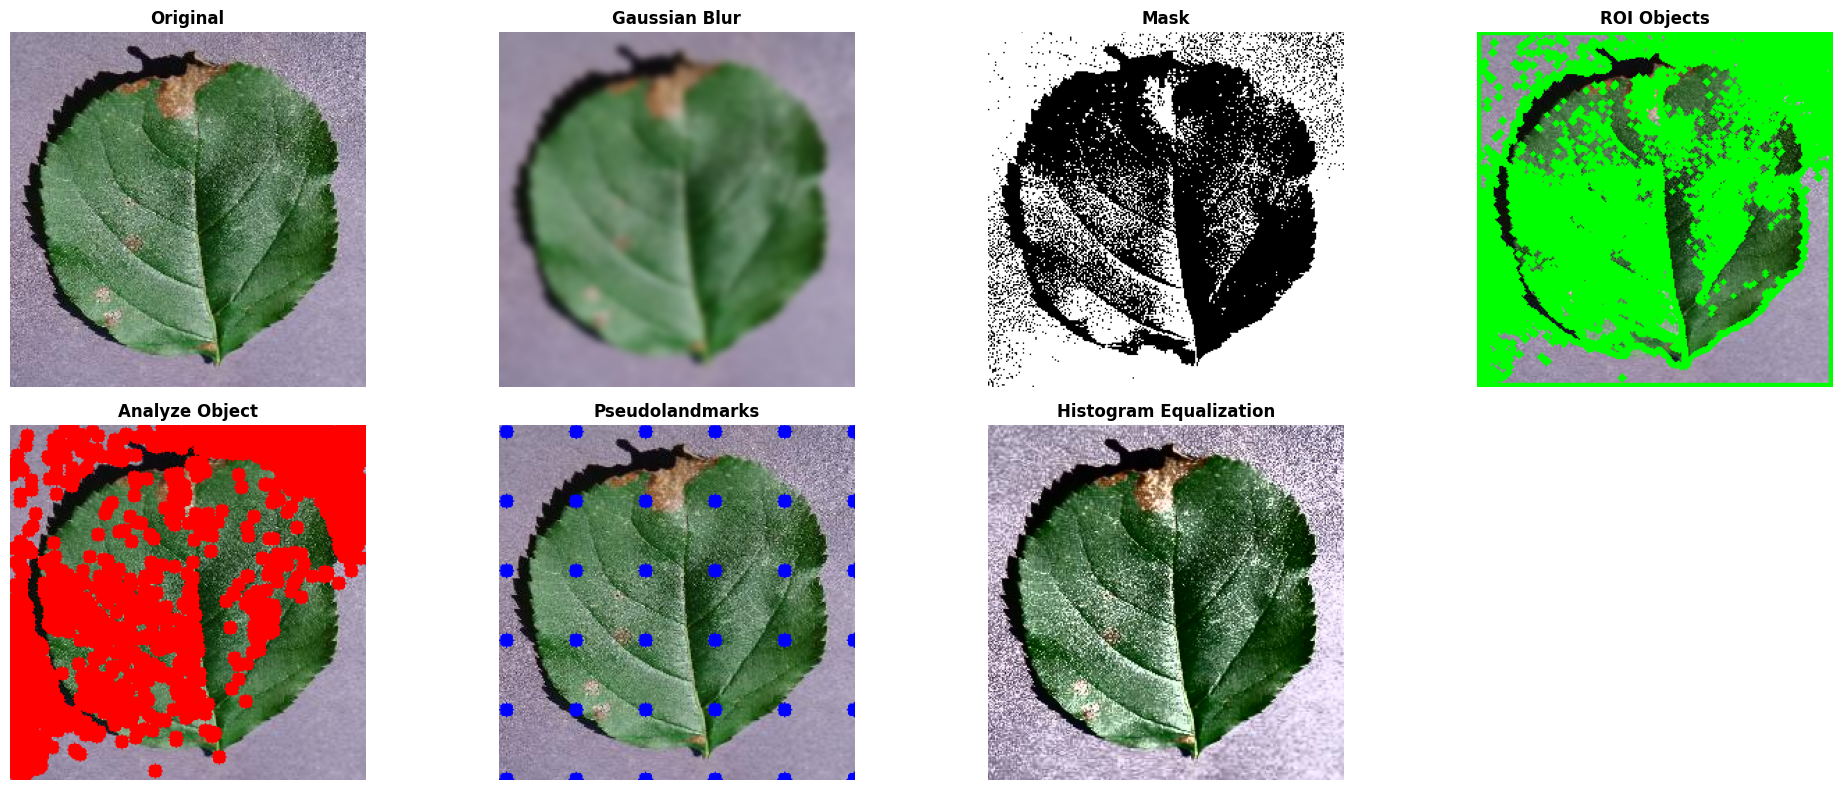


Description des transformations:
  1. Original: Image non modifiée — l'image telle qu'elle a été prise (aucun changement).
  2. Gaussian Blur: Réduction du bruit — lisse l'image en mélangeant les pixels voisins pour enlever le grain.
  3. Mask: Segmentation binaire — transforme l'image en noir et blanc pour isoler les zones claires.
  4. ROI Objects: Détection des contours — entoure en vert les formes détectées pour montrer les régions d'intérêt.
  5. Analyze Object: Identification des centroïdes — place un point rouge au centre de chaque objet détecté.
  6. Pseudolandmarks: Points de référence sur grille — ajoute des petits points réguliers pour repérer des positions.
  7. Histogram Equalization: Amélioration du contraste — rend les zones sombres et claires plus distinctes pour mieux voir les détails.


In [9]:

def transform_and_display(image_path):
    """
    Affiche 7 images : l'originale + 6 transformations.
    """
    image = cv2.imread(image_path)
    if image is None:
        print(f"Erreur: Impossible de lire l'image {image_path}")
        return

    transformations = {
        'Original': image,
        'Gaussian Blur': gaussian_blur(image),
        'Mask': mask_image(image),
        'ROI Objects': roi_objects(image),
        'Analyze Object': analyze_object(image),
        'Pseudolandmarks': pseudolandmarks(image),
        'Histogram Equalization': histogram_equalization(image)
    }

    plt.figure(figsize=(20, 8))
    for i, (title, transformed_image) in enumerate(transformations.items(), 1):
        plt.subplot(2, 4, i)
        if len(transformed_image.shape) == 2:  # Grayscale
            plt.imshow(transformed_image, cmap='gray')
        else:  # Color
            plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
        plt.title(title, fontsize=12, fontweight='bold')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("\nDescription des transformations:")
    print("  1. Original: Image non modifiée — l'image telle qu'elle a été prise (aucun changement).")
    print("  2. Gaussian Blur: Réduction du bruit — lisse l'image en mélangeant les pixels voisins pour enlever le grain.")
    print("  3. Mask: Segmentation binaire — transforme l'image en noir et blanc pour isoler les zones claires.")
    print("  4. ROI Objects: Détection des contours — entoure en vert les formes détectées pour montrer les régions d'intérêt.")
    print("  5. Analyze Object: Identification des centroïdes — place un point rouge au centre de chaque objet détecté.")
    print("  6. Pseudolandmarks: Points de référence sur grille — ajoute des petits points réguliers pour repérer des positions.")
    print("  7. Histogram Equalization: Amélioration du contraste — rend les zones sombres et claires plus distinctes pour mieux voir les détails.")

if os.path.exists(IMAGE_PATH):
    transform_and_display(IMAGE_PATH)


## 5. Transformation par Lot (Batch Processing)

Appliquez les transformations à plusieurs images d'un dossier.

In [5]:
# Définition de la fonction qui sauvegarde les transformations d'un dossier vers une destination
def save_transformed_images(src_dir, dst_dir, transform_type=None):
    """
    Sauvegarde toutes les transformations d'un répertoire source
    vers une destination.
    Si transform_type est spécifié, seule cette transformation est sauvegardée.
    """
    # Vérifie l'existence du dossier destination pour éviter les erreurs
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)
        print(f"Dossier créé: {dst_dir}")

    # Liste les fichiers JPG présents dans le dossier source
    image_files = [f for f in os.listdir(src_dir)
                   if f.lower().endswith(('.jpg'))]

    # Affiche un message si aucun fichier n'a été trouvé
    if not image_files:
        print(f"Aucune image trouvée dans {src_dir}")
        return

    # Informe du nombre d'images à traiter
    print(f"Traitement de {len(image_files)} images...")

    # Parcourt chaque fichier image du dossier source
    for filename in image_files:
        image_path = os.path.join(src_dir, filename)
        image = cv2.imread(image_path)

        # Vérifie la lecture de l'image avant de continuer
        if image is None:
            print(f"Attention: Impossible de lire {filename}")
            continue

        # Crée un dictionnaire des transformations applicables à l'image
        transformations = {
            'Gaussian_Blur': gaussian_blur(image),
            'Mask': mask_image(image),
            'Roi_Objects': roi_objects(image),
            'Analyze_Object': analyze_object(image),
            'Pseudolandmarks': pseudolandmarks(image),
            'Histogram_Equalization': histogram_equalization(image)
        }

        # Si un type de transformation est demandé, on ne conserve que celle-ci
        if transform_type and transform_type in transformations:
            transformations = {transform_type: transformations[transform_type]}

        # Sauvegarde chaque transformation dans le dossier destination
        for aug_name, transformed_image in transformations.items():
            base_name = os.path.splitext(filename)[0]
            output_path = os.path.join(dst_dir, f"{base_name}_{aug_name}.jpg")
            cv2.imwrite(output_path, transformed_image)

    # Message final confirmant l'export des images transformées
    print(f"Toutes les transformations sauvegardées dans {dst_dir}")

### Exemple d'utilisation du batch processing

In [6]:
SOURCE_DIR = "../Apple/Apple_Black_rot"
DEST_DIR = "../transformed_output"

save_transformed_images(SOURCE_DIR, DEST_DIR)

Dossier créé: ../transformed_output
Traitement de 620 images...
Toutes les transformations sauvegardées dans ../transformed_output


## 6. Analyse Comparative

Comparons les différentes transformations côte à côte pour mieux comprendre leurs effets.

In [7]:
# Déclare la fonction compare_transformations qui prend le chemin d'une image en paramètre
def compare_transformations(image_path):
    # Docstring décrivant l'objectif de la fonction
    # Déclare la fonction compare_transformations qui prend le chemin d'une image en paramètre
    def compare_transformations(image_path):
        # Docstring décrivant l'objectif de la fonction
        """
        Compare l'effet de chaque transformation avec des statistiques.

        Cette fonction lit une image et applique les 6 transformations définies dans le notebook.
        Pour l'image originale et pour chaque transformation elle affiche :
          - dimensions (pour l'originale),
          - intensité moyenne (mean) et écart-type (std) des valeurs de pixels,
          - type d'image (grayscale ou couleur).

        But : fournir un aperçu quantitatif rapide des changements induits par chaque
        transformation (ex. amélioration du contraste, réduction du bruit, perte d'information
        due au seuillage) afin d'aider au choix des pré-traitements pour l'analyse ou
        l'entraînement de modèles.

        Remarques :
          - Les images sont des numpy arrays au format BGR (OpenCV).
          - Les images en niveaux de gris ont une shape 2D, les images couleur 3D.
        """
        # Charge l'image depuis le chemin fourni en utilisant OpenCV
        image = cv2.imread(image_path)
        # Si l'image n'a pas pu être lue, affiche une erreur et quitte la fonction
        if image is None:
            print(f"Erreur: Impossible de lire l'image {image_path}")
            return

        # Affiche un en-tête indiquant le début de l'analyse
        print("=== ANALYSE DES TRANSFORMATIONS ===")
        # Affiche la taille de l'image (largeur x hauteur)
        print(f"\nImage originale: {image.shape[1]}x{image.shape[0]} pixels")
        # Calcule et affiche l'intensité moyenne de tous les canaux et pixels
        print(f"Intensité moyenne: {np.mean(image):.2f}")
        # Calcule et affiche l'écart-type des intensités de l'image
        print(f"Écart-type: {np.std(image):.2f}")

        # Crée un dictionnaire contenant chaque transformation appliquée à l'image
        transformations = {
            'Gaussian Blur': gaussian_blur(image),
            'Mask': mask_image(image),
            'ROI Objects': roi_objects(image),
            'Analyze Object': analyze_object(image),
            'Pseudolandmarks': pseudolandmarks(image),
            'Histogram Equalization': histogram_equalization(image)
        }

        # Parcourt chaque transformation du dictionnaire
        for name, trans_img in transformations.items():
            # Affiche le nom de la transformation en cours
            print(f"\n{name}:")
            # Calcule et affiche l'intensité moyenne de l'image transformée
            print(f"  Intensité moyenne: {np.mean(trans_img):.2f}")
            # Calcule et affiche l'écart-type de l'image transformée
            print(f"  Écart-type: {np.std(trans_img):.2f}")
            # Détecte si l'image transformée est en niveaux de gris (2D) ou en couleur (3D)
            if len(trans_img.shape) == 2:
                # Indique que c'est une image en niveaux de gris
                print("  Type: Grayscale")
            else:
                # Indique que c'est une image couleur (BGR -> affichée comme RGB ailleurs)
                print("  Type: Color (RGB)")

    # Si le chemin IMAGE_PATH existe, appelle la fonction de comparaison sur cette image
    if os.path.exists(IMAGE_PATH):
        compare_transformations(IMAGE_PATH)
    # Charge l'image depuis le chemin fourni en utilisant OpenCV
    image = cv2.imread(image_path)
    # Si l'image n'a pas pu être lue, affiche une erreur et quitte la fonction
    if image is None:
        print(f"Erreur: Impossible de lire l'image {image_path}")
        return

    # Affiche un en-tête indiquant le début de l'analyse
    print("=== ANALYSE DES TRANSFORMATIONS ===")
    # Affiche la taille de l'image (largeur x hauteur)
    print(f"\nImage originale: {image.shape[1]}x{image.shape[0]} pixels")
    # Calcule et affiche l'intensité moyenne de tous les canaux et pixels
    print(f"Intensité moyenne: {np.mean(image):.2f}")
    # Calcule et affiche l'écart-type des intensités de l'image
    print(f"Écart-type: {np.std(image):.2f}")

    # Crée un dictionnaire contenant chaque transformation appliquée à l'image
    transformations = {
        'Gaussian Blur': gaussian_blur(image),
        'Mask': mask_image(image),
        'ROI Objects': roi_objects(image),
        'Analyze Object': analyze_object(image),
        'Pseudolandmarks': pseudolandmarks(image),
        'Histogram Equalization': histogram_equalization(image)
    }

    # Parcourt chaque transformation du dictionnaire
    for name, trans_img in transformations.items():
        # Affiche le nom de la transformation en cours
        print(f"\n{name}:")
        # Calcule et affiche l'intensité moyenne de l'image transformée
        print(f"  Intensité moyenne: {np.mean(trans_img):.2f}")
        # Calcule et affiche l'écart-type de l'image transformée
        print(f"  Écart-type: {np.std(trans_img):.2f}")
        # Détecte si l'image transformée est en niveaux de gris (2D) ou en couleur (3D)
        if len(trans_img.shape) == 2:
            # Indique que c'est une image en niveaux de gris
            print("  Type: Grayscale")
        else:
            # Indique que c'est une image couleur (BGR -> affichée comme RGB ailleurs)
            print("  Type: Color (RGB)")

# Si le chemin IMAGE_PATH existe, appelle la fonction de comparaison sur cette image
if os.path.exists(IMAGE_PATH):
    compare_transformations(IMAGE_PATH)

=== ANALYSE DES TRANSFORMATIONS ===

Image originale: 256x256 pixels
Intensité moyenne: 116.21
Écart-type: 48.26

Gaussian Blur:
  Intensité moyenne: 116.21
  Écart-type: 40.76
  Type: Color (RGB)

Mask:
  Intensité moyenne: 130.04
  Écart-type: 127.47
  Type: Grayscale

ROI Objects:
  Intensité moyenne: 93.41
  Écart-type: 100.30
  Type: Color (RGB)

Analyze Object:
  Intensité moyenne: 94.57
  Écart-type: 95.13
  Type: Color (RGB)

Pseudolandmarks:
  Intensité moyenne: 114.83
  Écart-type: 53.30
  Type: Color (RGB)

Histogram Equalization:
  Intensité moyenne: 125.44
  Écart-type: 79.37
  Type: Color (RGB)
